Enter description for 'Severity':  a
Enter description for 'Noise Aug Temperature(F)':  b
Enter description for 'Noise Aug Wind_Chill(F)':  c
Enter description for 'Noise Aug Humidity(%)':  d
Enter description for 'Noise Aug Pressure(in)':  e
Enter description for 'Noise Aug Wind_Speed(mph)':  f


Field Descriptions
### Severity
a
### Noise Aug Temperature(F)
b
### Noise Aug Wind_Chill(F)
c
### Noise Aug Humidity(%)
d
### Noise Aug Pressure(in)
e
### Noise Aug Wind_Speed(mph)
f


## Data Description


,Severity,Noise Aug Temperature(F),Noise Aug Wind_Chill(F),Noise Aug Humidity(%),Noise Aug Pressure(in),Noise Aug Wind_Speed(mph)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.148333,61.705604,60.049283,64.198028,29.406118,7.440957
std,0.444668,19.883124,21.852755,23.304822,1.443890,5.478456
min,1.000000,-9.868009,-42.083567,-3.777528,21.258480,-3.176704
25%,2.000000,48.570544,46.173929,47.321714,28.761296,3.593031
50%,2.000000,63.749713,63.475803,66.798050,29.552060,6.966385
75%,2.000000,77.192960,76.158562,83.771893,30.349440,10.794380
max,4.000000,111.288763,115.763241,100.000000,33.402731,30.659531


Top 5,Bottom 5
2.0,2.0


Top 5,Bottom 5
-9.868009,53.940615
72.765445,53.951982
72.535452,53.962201
72.562762,53.965674
72.618896,111.288763


Top 5,Bottom 5
-42.083567,53.179839
72.083496,53.201029
71.997355,53.212155
72.032351,53.215673
72.035667,115.763241


Top 5,Bottom 5
100.0,100.0


Top 5,Bottom 5
21.258480,29.031445
30.046821,29.032125
30.039452,29.032698
30.040536,29.033039
30.041492,33.402731


Top 5,Bottom 5
-3.176704,5.111799
9.090862,5.112230
9.031954,5.121677
9.033754,5.126030
9.034375,30.659531


Top 5,Bottom 5
Day,Day


Top 5,Bottom 5
Day,Day


Top 5,Bottom 5
Day,Day


Top 5,Bottom 5
Day,Day


<Figure size 1400x800 with 0 Axes>

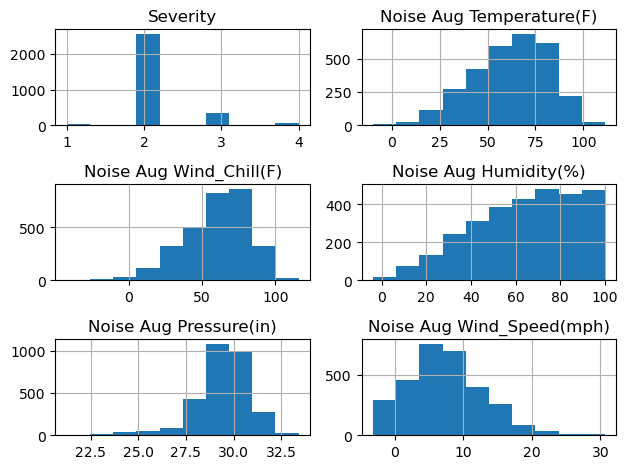

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
from io import BytesIO

# Set df
df = pd.read_csv("/Users/peterripperger/Desktop/Startup/data/Initial Products/car_crash_augmented.csv")

# Data Description
desc = df.describe()

# Styles for the table
style = """
    <style>
        .styled-table {
            border-collapse: collapse;
            margin: 5px 0;
            font-size: 0.9em;
            font-family: Arial, Helvetica, sans-serif;
            min-width: 400px;
            max-width: 80%;
            border-radius: 5px 5px 0 0;
            overflow: hidden;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }

        .styled-table thead tr {
            background-color: #009879;
            color: #0a0a0a;
            text-align: left;
        }

        .styled-table th,
        .styled-table td {
            padding: 12px 15px;
        }

        .styled-table tbody tr {
            border-bottom: 1px solid #dddddd;
        }

        .styled-table tbody tr:nth-of-type(even) {
            background-color: #;
        }

        .styled-table tbody tr:last-of-type {
            border-bottom: 2px solid #009879;
        }

    </style>
    
"""

data_desc = """
## Data Description
"""
# Ask for user input
user_inputs = []
user_inputs.append("Field Descriptions")
for column in desc.columns:
    description = input(f"Enter description for '{column}': ")
    user_inputs.append(f"### {column}\n{description}")

# Display user input
display(Markdown("\n".join(user_inputs)))

# Display the styles and data description
display(HTML(style))
display(Markdown(data_desc))
display(HTML(desc.to_html(classes='styled-table')))

# Modes
modes = df.mode()
mode_data = """
## Modes
"""

# Display modes
for column in modes.columns:
    mode_counts = modes[column].value_counts()
    top_5 = mode_counts.head(5).index.tolist()  # Extract top 5 values
    bottom_5 = mode_counts.tail(5).index.tolist()  # Extract bottom 5 values

    # Create a DataFrame with top and bottom values side by side
    combined_table = pd.DataFrame({
        "Top 5": top_5,
        "Bottom 5": bottom_5
    })

    # Convert the DataFrame to an HTML table with styling
    table_html = combined_table.to_html(
        classes='styled-table',
        escape=False,
        index=False
    )

    # Add CSS styling for centering columns and autofitting table width
    styled_html = f"""
    <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 10px 0;
            font-size: 14px;
            text-align: center;
            width: 80%;
            margin-left: auto;
            margin-right: auto;
        }}
        .styled-table th, .styled-table td {{
            padding: 8px 12px;
            border: 1px solid #ddd;
        }}
    </style>
    {table_html}
    """

    # Combine the text for display
    mode_text = f"<strong>{column}</strong><br>{styled_html}"
    
    # Display the HTML content
    display(HTML(mode_text))
    
# Distributions
plt.figure(figsize=(14, 8))
df.hist()
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os

# File paths
output_html_path = "/Users/peterripperger/Desktop/Startup/data/Output/report.html"
output_word_path = "/Users/peterripperger/Desktop/Startup/data/Output/report.docx"

# Set df
df = pd.read_csv("/Users/peterripperger/Desktop/Startup/data/Initial Products/car_crash_augmented.csv")

# Data Description
desc = df.describe()

# Start HTML content
html_content = """
<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        h1, h2, h3 {
            color: #333;
            text-align: center;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 12px;
        }
        table, th, td {
            border: 1px solid #ddd;
        }
        th, td {
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
        img {
            display: block;
            margin: 20px auto;
            max-width: 600px; /* Restrict image width */
            height: auto;
        }
    </style>
</head>
<body>
    <h1>Dataset Report</h1>
"""

# Add Data Description
html_content += "<h2>Data Description</h2>"
html_content += "<table>"
html_content += "<tr><th></th>" + "".join(f"<th>{col}</th>" for col in desc.columns) + "</tr>"
for index, row in desc.iterrows():
    html_content += f"<tr><td>{index}</td>" + "".join(f"<td>{val:.2f}</td>" for val in row) + "</tr>"
html_content += "</table>"

# Add Modes Section
html_content += "<h2>Modes</h2>"

modes = df.mode()
for column in modes.columns:
    mode_counts = df[column].value_counts()
    top_5 = mode_counts.head(5).index.tolist()  # Extract top 5 values
    bottom_5 = mode_counts.tail(5).index.tolist()  # Extract bottom 5 values

    # Create a DataFrame with top and bottom values side by side
    html_content += f"<h3>{column}</h3>"
    html_content += "<table><tr><th>Top 5</th><th>Bottom 5</th></tr>"
    for i in range(max(len(top_5), len(bottom_5))):
        top_val = top_5[i] if i < len(top_5) else ""
        bottom_val = bottom_5[i] if i < len(bottom_5) else ""
        html_content += f"<tr><td>{top_val}</td><td>{bottom_val}</td></tr>"
    html_content += "</table>"

# Add Distribution Section
html_content += "<h2>Distributions</h2>"

# Save plots as images and include in HTML
plt.figure(figsize=(14, 8))
df.hist(bins=15, edgecolor='black', layout=(5, 5))
plt.tight_layout()
dist_plot_path = "/Users/peterripperger/Desktop/Startup/data/Output/distributions.png"
plt.savefig(dist_plot_path)
plt.close()

html_content += f'<img src="{dist_plot_path}" alt="Distributions">'

# Close HTML content
html_content += """
</body>
</html>
"""

# Save HTML file
with open(output_html_path, "w") as f:
    f.write(html_content)

# Convert HTML to Word
try:
    from pypandoc import convert_file
    convert_file(output_html_path, 'docx', outputfile=output_word_path)
except Exception as e:
    print(f"Word conversion failed: {e}. Ensure `pypandoc` and Pandoc are installed.")

print(f"HTML report saved to: {output_html_path}")
print(f"Word report saved to: {output_word_path}")


Word conversion failed: No pandoc was found: either install pandoc and add it
to your PATH or or call pypandoc.download_pandoc(...) or
install pypandoc wheels with included pandoc.. Ensure `pypandoc` and Pandoc are installed.
HTML report saved to: /Users/peterripperger/Desktop/Startup/data/Output/report.html
Word report saved to: /Users/peterripperger/Desktop/Startup/data/Output/report.docx


<Figure size 1400x800 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pdfkit
import os

# Define file paths
input_csv_path = "/Users/peterripperger/Desktop/Startup/data/Initial Products/car_crash_augmented.csv"
output_pdf_path = "/Users/peterripperger/Desktop/Startup/data/Output/report.pdf"
temp_dir = "temp"

# Ensure output directories exist
os.makedirs(temp_dir, exist_ok=True)
os.makedirs(os.path.dirname(output_pdf_path), exist_ok=True)

# Read the dataset
df = pd.read_csv(input_csv_path)

# Generate Data Description
desc = df.describe()

# Collect HTML content
html_content = """
<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        .styled-table {
            border-collapse: collapse;
            margin: 10px 0;
            font-size: 14px;
            text-align: center;
            width: 100%;
        }
        .styled-table th, .styled-table td {
            padding: 8px 12px;
            border: 1px solid #ddd;
        }
        .styled-table th {
            background-color: #009879;
            color: white;
        }
        h2 {
            color: #009879;
        }
    </style>
</head>
<body>
"""

# Add Data Description
html_content += "<h2>Data Description</h2>"
html_content += desc.to_html(classes='styled-table', escape=False)

# Add Modes Section
html_content += "<h2>Modes</h2>"

modes = df.mode()
for column in modes.columns:
    mode_counts = df[column].value_counts()
    top_5 = mode_counts.head(5).index.tolist()  # Extract top 5 values
    bottom_5 = mode_counts.tail(5).index.tolist()  # Extract bottom 5 values

    # Create a DataFrame with top and bottom values side by side
    combined_table = pd.DataFrame({
        "Top 5": top_5,
        "Bottom 5": bottom_5
    })

    # Convert the DataFrame to an HTML table
    html_content += f"<h3>{column}</h3>"
    html_content += combined_table.to_html(classes='styled-table', escape=False, index=False)

# Add Distributions Section
html_content += "<h2>Distributions</h2>"

# Save plots as images
plt.figure(figsize=(10, 6))
df.hist(bins=15, figsize=(20, 15), layout=(5, 5), edgecolor='black')
plt.tight_layout()
dist_plot_path = os.path.join(temp_dir, "distributions.png")
plt.savefig(dist_plot_path)
plt.close()

# Embed distribution plot in HTML
html_content += f'<img src="{dist_plot_path}" alt="Distributions" style="width: 100%;">'

# Close HTML content
html_content += """
</body>
</html>
"""

# Save the HTML file
html_file_path = os.path.join(temp_dir, "report.html")
with open(html_file_path, "w") as f:
    f.write(html_content)

# Configure pdfkit
config = pdfkit.configuration(wkhtmltopdf='/path/to/wkhtmltopdf')  # Replace with your wkhtmltopdf path if needed

# Convert HTML to PDF
pdfkit.from_file(html_file_path, output_pdf_path, configuration=config)

# Clean up temporary files
os.remove(html_file_path)
os.remove(dist_plot_path)

print(f"PDF report generated at: {output_pdf_path}")

OSError: No wkhtmltopdf executable found: "/path/to/wkhtmltopdf"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf

<Figure size 1000x600 with 0 Axes>